## 讀取＆寫入資料

### 使用內建功能讀取 txt 檔

In [11]:
with open("../data/day03_example/example.txt", 'r') as f:
    data = f.readlines()
print(data)

['id,sex,age,score\n', '001,F,20,77\n', '002,F,25,90\n', '003,M,22,80\n', '004,F,30,66\n', '005,M,40,60\n', '006,M,29,87']


### 將 txt 轉成 pandas dataframe

In [5]:
import pandas as pd

data = []
with open("../data/day03_example/example.txt", 'r') as f:
    for line in f:
        line = line.replace('\n', '').split(',') # 將每句最後的 /n 取代成空值後，再以逗號斷句
        data.append(line)
data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

In [6]:
df = pd.DataFrame(data[1:])
df.columns = data[0]
df

,id,sex,age,score
0,001,F,20,77
1,002,F,25,90
2,003,M,22,80
3,004,F,30,66
4,005,M,40,60
5,006,M,29,87


### 將資料轉成 json 檔後輸出
將 json 讀回來後，是否與我們原本想要存入的方式一樣? (以 id 為 key)

In [12]:
import json

# 此存入方式，會將 column name 做為主要的 key, row name 做為次要的 key
df.to_json('../data/day03_example/example01.json')
df

,sex,age,score
id,,,
001,F,20,77
002,F,25,90
003,M,22,80
004,F,30,66
005,M,40,60
006,M,29,87


In [13]:
# Open your example01.json
with open('../data/day03_example/example01.json', 'r') as f:
    j1 = json.load(f)
j1

{'sex': {'001': 'F',
  '002': 'F',
  '003': 'M',
  '004': 'F',
  '005': 'M',
  '006': 'M'},
 'age': {'001': '20',
  '002': '25',
  '003': '22',
  '004': '30',
  '005': '40',
  '006': '29'},
 'score': {'001': '77',
  '002': '90',
  '003': '80',
  '004': '66',
  '005': '60',
  '006': '87'}}

In [15]:
# Return to original data
df = pd.DataFrame(data[1:])
df.columns = data[0]

df.set_index('id', inplace=True)
df

,sex,age,score
id,,,
001,F,20,77
002,F,25,90
003,M,22,80
004,F,30,66
005,M,40,60
006,M,29,87


In [17]:
df.to_json('../data/day03_example/example02.json', orient='index')

In [19]:
with open('../data/day03_example/example02.json', 'r') as f:
    j2 = json.load(f)
j2

{'001': {'sex': 'F', 'age': '20', 'score': '77'},
 '002': {'sex': 'F', 'age': '25', 'score': '90'},
 '003': {'sex': 'M', 'age': '22', 'score': '80'},
 '004': {'sex': 'F', 'age': '30', 'score': '66'},
 '005': {'sex': 'M', 'age': '40', 'score': '60'},
 '006': {'sex': 'M', 'age': '29', 'score': '87'}}

### 將檔案存為 npy 檔
一個專門儲存 numpy array 的檔案格式
使用 npy 通常可以讓你更快讀取資料喔!  
[建議閱讀](https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161)

In [15]:
import numpy as np
# 將 data 的數值部分轉成 numpy array
array = np.array(data[1:])
array

array(['001,F,20,77\n', '002,F,25,90\n', '003,M,22,80\n', '004,F,30,66\n',
       '005,M,40,60\n', '006,M,29,87'], dtype='|S12')

In [21]:
np.save(arr=array, file='../data/day03_example/example.npy')

In [24]:
array_back = np.load('../data/day03_example/example.npy')
array_back

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

### Pickle
存成 pickle 檔  
什麼都包，什麼都不奇怪的 [Pickle](https://docs.python.org/3/library/pickle.html)  
比如說 [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) 的資料集就是用 pickle 包的喔!

#### Note
pickle模組用來實現python物件的序列化和反序列化。通常地pickle將python物件序列化為二進位制流或檔案。

In [25]:
import pickle
with open('../data/day03_example/example.pkl', 'wb') as f:
    pickle.dump(file=f, obj=data)

In [27]:
with open('../data/day03_example/example.pkl', 'rb') as f:
    pkl_data = pickle.load(f)
pkl_data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

### 讀取圖片

常見的套件:
1.skimage
2.PIL
3.OpenCV

#### Note 

Pillow只提供最基礎的數字圖像處理，功能有限。

Opencv實際上是用C++來做成，只是提供了python接口，功能豐富(人臉、數字辨識等等)。

Scikit-image是基於scipy的一款圖像處理器，它將圖片使用numpy處理，相容性很適合python。

三種 module 各有優缺點。但是實務操作上，最常用的是 cv2 (因為底層使用 C 實作且優化過)，但假設你未來在深度學習的時候，你決定選擇投入 PyTorch 流派，那他們常使用的會是 PIL。skimage.io 通常沒有人會用，但是有一個例外是讀 .tiff 的圖時會用到。

參考[資料視覺化](https://medium.com/jameslearningnote/資料分析-機器學習-第2-5講-資料視覺化-matplotlib-seaborn-plotly-75cd353d6d3f)

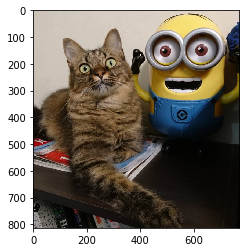

In [13]:
import matplotlib.pyplot as plt
# 如果不想要每次在jupyter notebook顯示都寫.show()，可以在jupyter notebook加上%matplotlib inline
%matplotlib inline
import skimage.io as skio

img1 = skio.imread('../data/day03_example/example.jpg')
plt.imshow(img1)
plt.show()

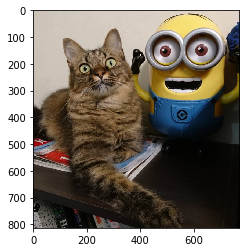

In [16]:
from PIL import Image
img2 = Image.open('../data/day03_example/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

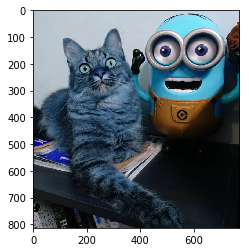

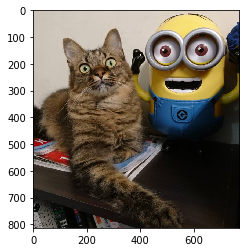

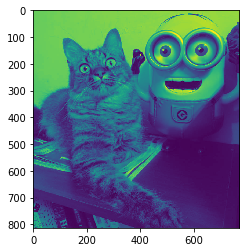

In [27]:
import cv2
img3 = cv2.imread('../data/day03_example/example.jpg')
plt.imshow(img3)
plt.show()

# 將 BGR 圖片轉為 RGB 圖片
# 方法一 
# img3 = img_bgr[:,:,::-1]
# 方法二
img_rbg = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img_rbg)
plt.show()

# 使用 OpenCV 讀取灰階圖檔
img_gray = cv2.imread('../data/day03_example/example.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.show()

### 比較三種開圖方式的時間 - 比較讀取 1000 次¶

In [31]:
N_times = 100

In [32]:
%%timeit     # Timer
im = np.array([skio.imread('../data/day03_example/example.jpg') for _ in range(N_times)])

1 loop, best of 3: 1.46 s per loop


In [33]:
%%timeit
im = np.array([np.array(Image.open('../data/day03_example/example.jpg')) for _ in range(N_times)])

1 loop, best of 3: 1.58 s per loop


In [34]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('../data/day03_example/example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

1 loop, best of 3: 1.58 s per loop


### 將影像存成 mat

#### Note

mat → Matlab資料

負責運算的Scipy、管理資料集Pandas和提供視覺化的Matplotlib函式庫，在ML專案中，都有超過4成的占有率。

物件中命名為 __name__ 底線的變數，一般都是私有變數 [補充資料](https://aji.tw/python%E4%BD%A0%E5%88%B0%E5%BA%95%E6%98%AF%E5%9C%A8__)

In [35]:
import scipy.io as sio
sio.savemat(file_name='../data/day03_example/example.mat', mdict={'img': img1})

In [40]:
mat_arr = sio.loadmat('../data/day03_example/example.mat')
print(mat_arr.keys())

['__version__', '__header__', 'img', '__globals__']


In [41]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(813, 771, 3)


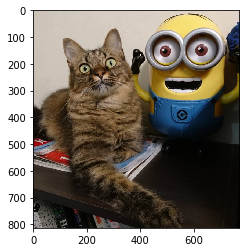

In [42]:
plt.imshow(mat_arr)
plt.show()

### 練習時間

#### 1-1 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

#### 1-2 將所提供的 txt 轉成 pandas dataframe

#### 2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片